# Electrical Distribution Network Energy Consumption Forecasting based upon Victorian MRIM Meter Data

In this notebook, exploratory data analysis is conducted:
- To check for missing values
- Identify trends and seasonalities in the data
- Check for stationarity to ensure model robustness


# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading into the Data

In [2]:
df = pd.read_csv('data_citipower.csv')

# EDA

In [3]:
df.head()

,Unnamed: 0,SETTD,PROFILEAREA,DAILYT,VAL01,VAL02,VAL03,VAL04,VAL05,VAL06,...,VAL40,VAL41,VAL42,VAL43,VAL44,VAL45,VAL46,VAL47,VAL48,DCTC
0,0,01/04/2014,CITIPOWER,6363749.701,83948.634,75686.720,70851.453,67607.385,66124.942,64953.942,...,160069.821,152968.056,145198.285,133952.389,121154.389,113845.677,111219.265,111446.631,106211.512,MRIM
1,1,02/04/2014,CITIPOWER,5630825.535,93503.589,84693.357,79590.499,76384.550,74882.906,73439.136,...,124538.811,119661.538,113667.967,105081.148,95684.746,91694.112,91698.657,93790.379,89377.501,MRIM
2,2,03/04/2014,CITIPOWER,5173891.385,77688.455,69851.785,65002.304,62203.224,60863.263,59985.433,...,122934.586,118084.353,112122.808,104010.749,94635.246,90432.761,90406.507,92838.823,89320.024,MRIM
3,3,04/04/2014,CITIPOWER,5044050.180,77761.113,69530.046,64437.280,61304.327,59653.842,58588.591,...,114460.060,110398.858,105854.672,100063.838,93741.476,91659.930,93286.271,96403.437,92482.282,MRIM
4,4,05/04/2014,CITIPOWER,4383318.300,80930.298,72390.242,66461.934,63121.603,60993.088,59567.853,...,107937.349,104206.712,100866.709,96744.697,91474.783,91223.017,94194.091,98842.620,95486.413,MRIM


In [4]:
df.shape

(2009, 53)

In [5]:
df.columns

Index(['Unnamed: 0', 'SETTD', 'PROFILEAREA', 'DAILYT', 'VAL01', 'VAL02',
       'VAL03', 'VAL04', 'VAL05', 'VAL06', 'VAL07', 'VAL08', 'VAL09', 'VAL10',
       'VAL11', 'VAL12', 'VAL13', 'VAL14', 'VAL15', 'VAL16', 'VAL17', 'VAL18',
       'VAL19', 'VAL20', 'VAL21', 'VAL22', 'VAL23', 'VAL24', 'VAL25', 'VAL26',
       'VAL27', 'VAL28', 'VAL29', 'VAL30', 'VAL31', 'VAL32', 'VAL33', 'VAL34',
       'VAL35', 'VAL36', 'VAL37', 'VAL38', 'VAL39', 'VAL40', 'VAL41', 'VAL42',
       'VAL43', 'VAL44', 'VAL45', 'VAL46', 'VAL47', 'VAL48', 'DCTC'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0       int64
SETTD           object
PROFILEAREA     object
DAILYT         float64
VAL01          float64
VAL02          float64
VAL03          float64
VAL04          float64
VAL05          float64
VAL06          float64
VAL07          float64
VAL08          float64
VAL09          float64
VAL10          float64
VAL11          float64
VAL12          float64
VAL13          float64
VAL14          float64
VAL15          float64
VAL16          float64
VAL17          float64
VAL18          float64
VAL19          float64
VAL20          float64
VAL21          float64
VAL22          float64
VAL23          float64
VAL24          float64
VAL25          float64
VAL26          float64
VAL27          float64
VAL28          float64
VAL29          float64
VAL30          float64
VAL31          float64
VAL32          float64
VAL33          float64
VAL34          float64
VAL35          float64
VAL36          float64
VAL37          float64
VAL38          float64
VAL39          float64
VAL40      

# Setting Date as its index

In [7]:
df['SETTD'] = pd.to_datetime(df['SETTD'], dayfirst = True)

In [8]:
df = df.set_index('SETTD')

In [9]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

# Checking for Nulls

In [10]:
sum(df.isnull().sum())

0

In [11]:
df['PROFILEAREA'].unique()

array(['CITIPOWER'], dtype=object)

# Summation Check

Checking whether the summation of half-hourly aggregated data **(VAL01 - VAL48)** matches **DAILYT**.

In [12]:
check_sum = pd.DataFrame()
check_sum['DailyT'] = df.DAILYT

In [13]:
vals = df[['VAL01', 'VAL02', 'VAL03', 'VAL04', 'VAL05', 'VAL06', 'VAL07', 'VAL08', 'VAL09', 'VAL10', 'VAL11', 'VAL12', 
           'VAL13', 'VAL14', 'VAL15', 'VAL16', 'VAL17', 'VAL18', 'VAL19', 'VAL20', 'VAL21', 'VAL22', 'VAL23', 'VAL24', 
           'VAL25', 'VAL26', 'VAL27', 'VAL28', 'VAL29', 'VAL30', 'VAL31', 'VAL32', 'VAL33', 'VAL34', 'VAL35', 'VAL36', 
           'VAL37', 'VAL38', 'VAL39', 'VAL40', 'VAL41', 'VAL42', 'VAL43', 'VAL44', 'VAL45', 'VAL46', 'VAL47', 'VAL48']]

vals['total'] = vals.sum(axis = 1)

In [14]:
#CalcT  =  Calculate Sum of VAL01 - VAL48
check_sum['CalcT'] = vals['total']
# Check whether the calculated total is equal to the recorded DAILYT
check_sum['equals'] = (check_sum['DailyT'] == check_sum['CalcT'])
# Check the difference betwwen the calculated sum and the recorded DAILYT
check_sum['diff'] = check_sum['DailyT'] - check_sum['CalcT']

check_sum.head()

,DailyT,CalcT,equals,diff
SETTD,,,,
2014-04-01,6363749.701,6363749.701,False,9.313226e-10
2014-04-02,5630825.535,5630825.535,True,0.000000e+00
2014-04-03,5173891.385,5173891.385,True,0.000000e+00
2014-04-04,5044050.180,5044050.180,True,0.000000e+00
2014-04-05,4383318.300,4383318.300,True,0.000000e+00


In [15]:
check_sum['equals'].value_counts(normalize = True)

True     0.609258
False    0.390742
Name: equals, dtype: float64

In [16]:
check_sum['diff'].value_counts(normalize = True)

 0.000000e+00    0.609258
 9.313226e-10    0.158288
-9.313226e-10    0.133897
 1.862645e-09    0.042807
-1.862645e-09    0.037332
-4.656613e-10    0.008960
 4.656613e-10    0.007466
-2.793968e-09    0.000996
 2.793968e-09    0.000996
Name: diff, dtype: float64

Looking at the difference between the daily total and the summation of VAL01 - VAL48...


In [17]:
print('Maximum difference:',check_sum['diff'].max())
print('Minimum difference:',check_sum['diff'].min())

Maximum difference: 2.7939677238464355e-09
Minimum difference: -2.7939677238464355e-09


The difference between DAILYT and the sum of VAL01 - VAL48 are insignificant, possibly due to rounding errors. Therefore, it can be concluded that the sum of VAL01 till VAL48 equals the daily total (DAILTY).

To reduce the 'noise' that can be generated from half-hourly data, the daily total, **DAILYT** will be used. 

In [18]:
data = df[['PROFILEAREA', 'DAILYT']]
data

,PROFILEAREA,DAILYT
SETTD,,
2014-04-01,CITIPOWER,6363749.701
2014-04-02,CITIPOWER,5630825.535
2014-04-03,CITIPOWER,5173891.385
2014-04-04,CITIPOWER,5044050.180
2014-04-05,CITIPOWER,4383318.300
...,...,...
2019-09-26,CITIPOWER,5357014.025
2019-09-27,CITIPOWER,5219544.620
2019-09-28,CITIPOWER,5036389.054


In [19]:
data= data.drop(['PROFILEAREA'],axis = 1)

In [20]:
data.head(10)

,DAILYT
SETTD,
2014-04-01,6363749.701
2014-04-02,5630825.535
2014-04-03,5173891.385
2014-04-04,5044050.180
2014-04-05,4383318.300
2014-04-06,4262109.115
2014-04-07,5099462.930
2014-04-08,5181023.405
2014-04-09,5263781.889


In [21]:
data.shape

(2009, 1)

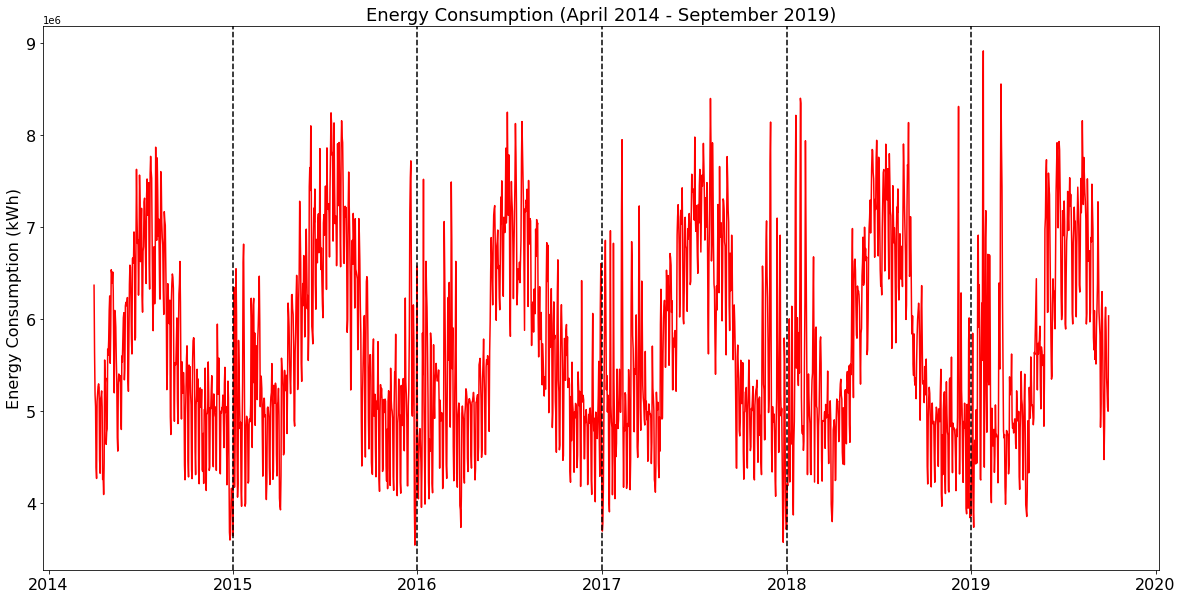

In [22]:
plt.figure(figsize = (20,10))
plt.plot(data, color = 'r')
for year in range(2015,2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--')
plt.title('Energy Consumption (April 2014 - September 2019)', fontsize = 18)
plt.ylabel('Energy Consumption (kWh)', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [23]:
# save data to a csv for other models
data.to_csv('citipower.csv')

# Seasonal Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

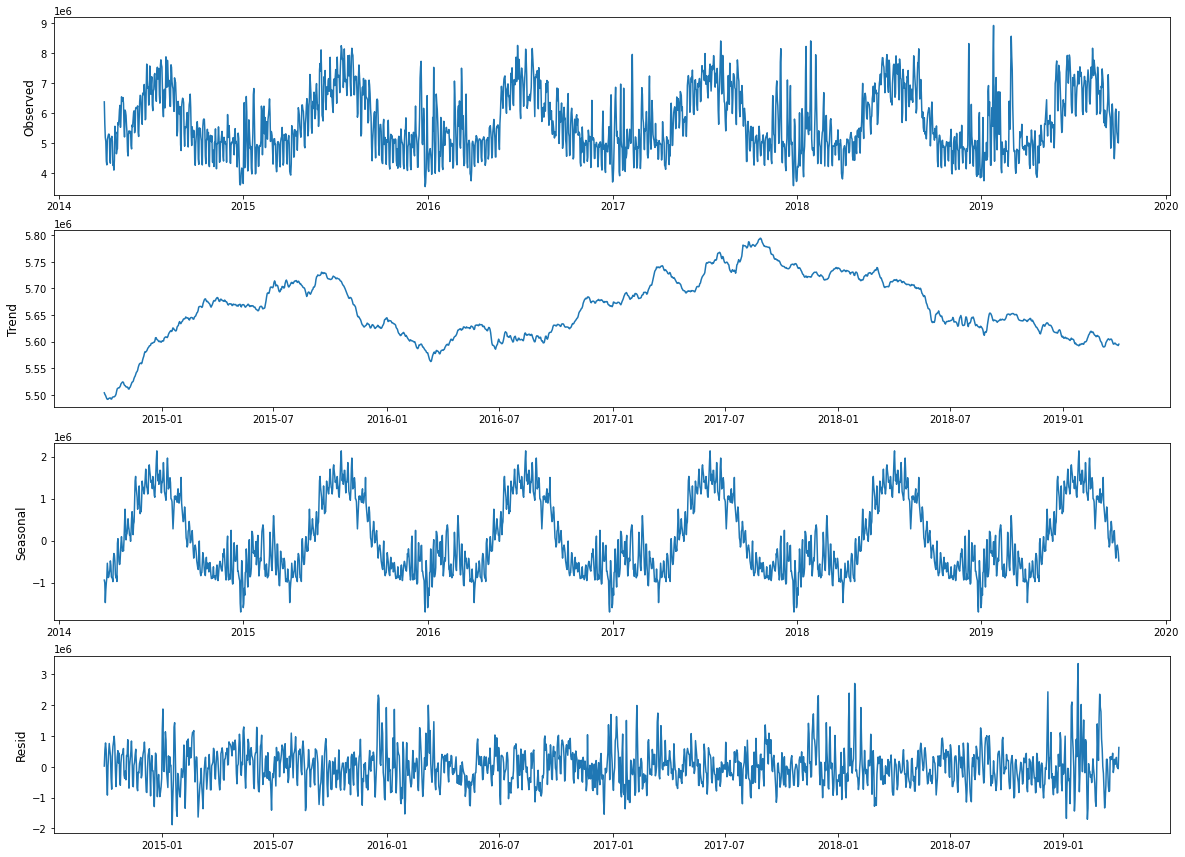

In [25]:
decomp = seasonal_decompose(data, period = 365)
trend_year = decomp.trend
seasonal_year = decomp.seasonal
resid_year = decomp.resid

plt.figure(figsize = (20,15))
plt.subplot(411)
plt.plot(data)
plt.ylabel('Observed', fontsize = 12)
plt.subplot(412)
plt.plot(trend_year)
plt.ylabel('Trend', fontsize = 12)
plt.subplot(413)
plt.plot(seasonal_year)
plt.ylabel('Seasonal', fontsize = 12)
plt.subplot(414)
plt.plot(resid_year)
plt.ylabel('Resid', fontsize = 12)
plt.show()

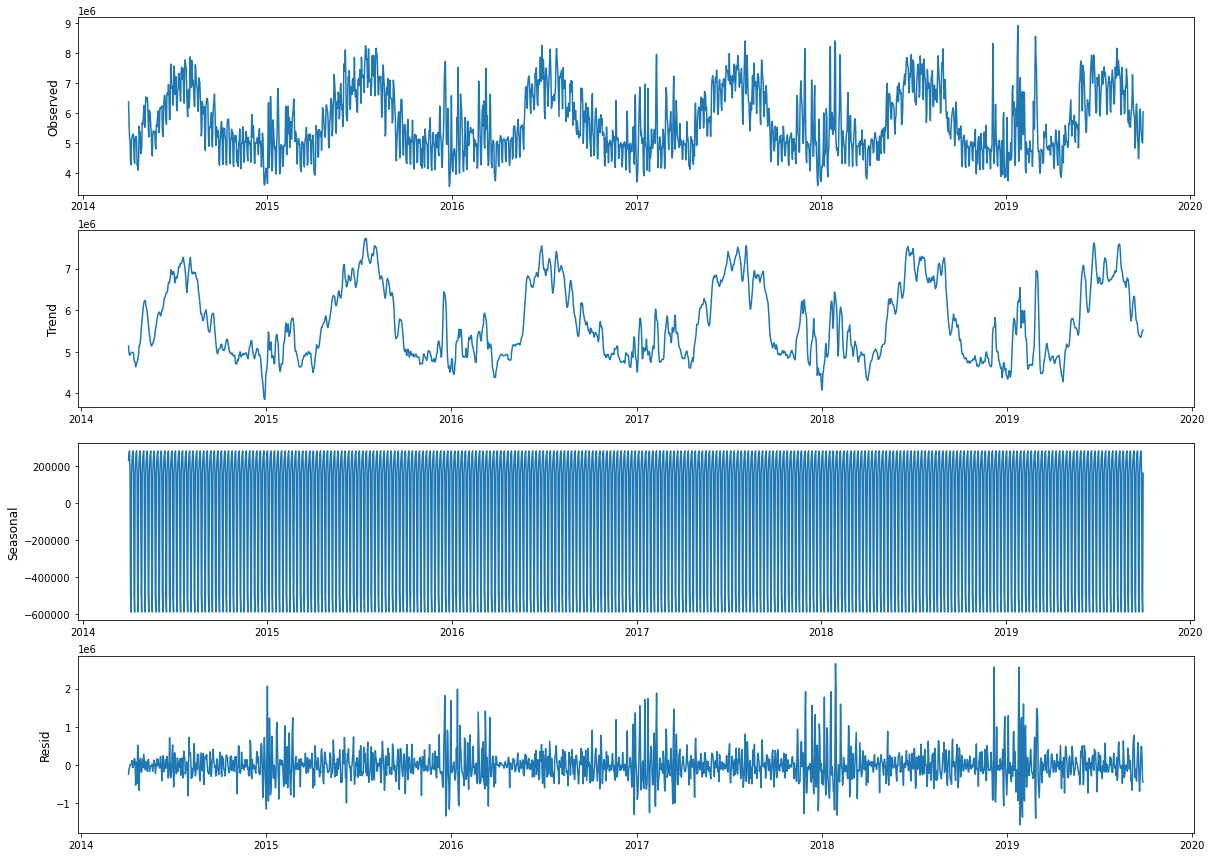

In [26]:
decomp = seasonal_decompose(data, period = 7)
trend_w = decomp.trend
seasonal_w = decomp.seasonal
resid_w = decomp.resid

plt.figure(figsize = (20,15))
plt.subplot(411)
plt.plot(data)
plt.ylabel('Observed', fontsize = 12)
plt.subplot(412)
plt.plot(trend_w)
plt.ylabel('Trend', fontsize = 12)
plt.subplot(413)
plt.plot(seasonal_w)
plt.ylabel('Seasonal', fontsize = 12)
plt.subplot(414)
plt.plot(resid_w)
plt.ylabel('Resid', fontsize = 12)
plt.show()

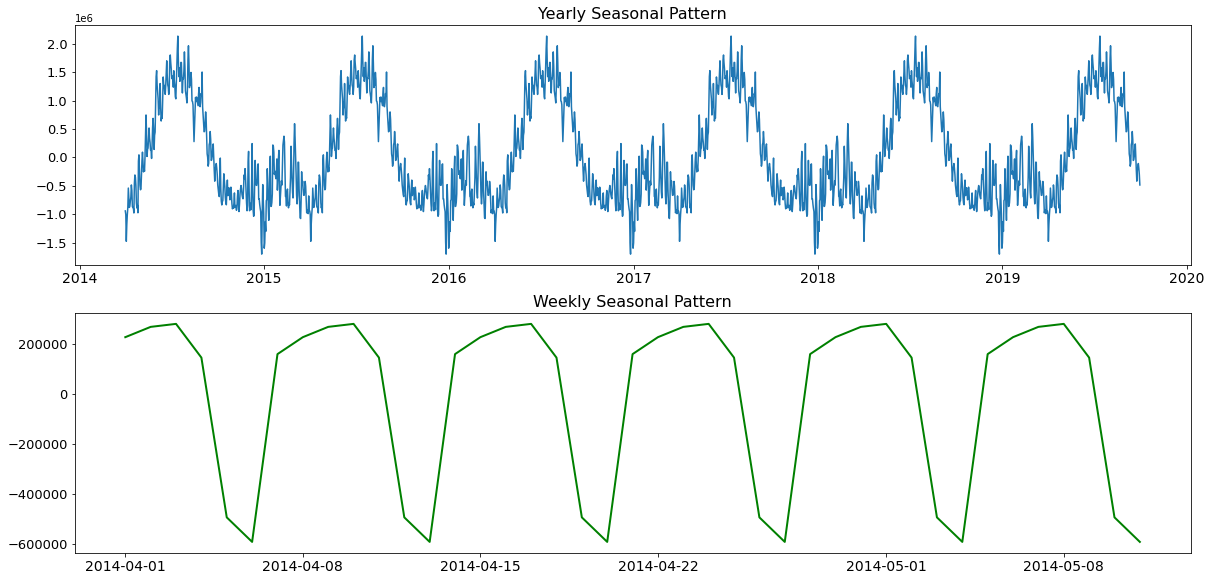

In [27]:
plt.figure(figsize = (20,15))
plt.subplot(311)
plt.plot(seasonal_year)
plt.title('Yearly Seasonal Pattern', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.subplot(312)
plt.plot(seasonal_w.iloc[:41], color = 'g', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.title('Weekly Seasonal Pattern', fontsize = 16)


plt.show()

The data contains yearly and weekly seasonalities.

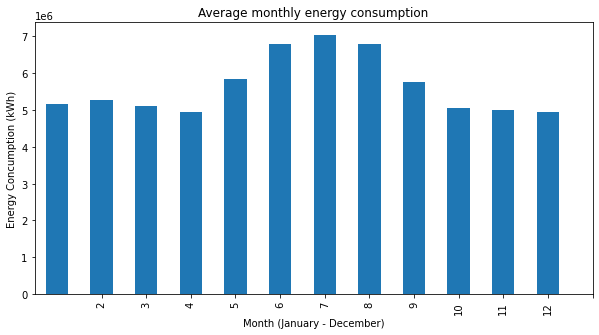

In [28]:
data.groupby(data.index.month).DAILYT.mean().plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Month (January - December)')
plt.ylabel('Energy Concumption (kWh)')
plt.title('Average monthly energy consumption')
plt.xticks(range(1,13))
plt.show()

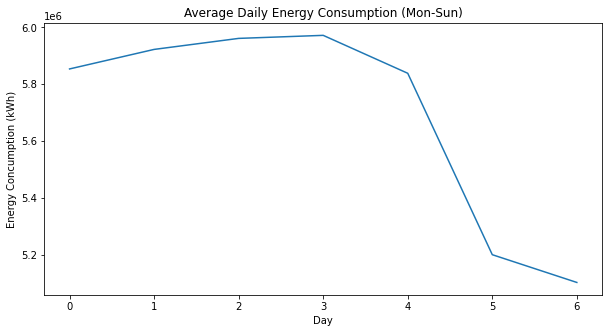

In [29]:
mean_weekday = data.groupby(data.index.weekday).DAILYT.mean()
plt.figure(figsize = (10,5))
plt.plot(mean_weekday)
plt.xlabel('Day')
plt.ylabel('Energy Concumption (kWh)')
plt.title('Average Daily Energy Consumption (Mon-Sun)')
plt.show()

- Majority of the energy consumption occurs during the weekdays
- Less energy consumption during the weekends

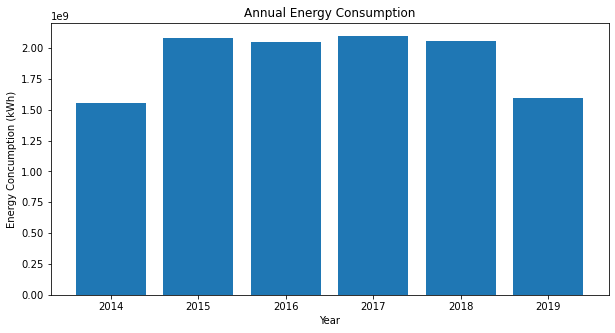

In [30]:
sum_year = data.groupby(data.index.year).DAILYT.sum()
plt.figure(figsize = (10,5))
plt.bar(sum_year.index,sum_year)
plt.xlabel('Year')
plt.ylabel('Energy Concumption (kWh)')
plt.title('Annual Energy Consumption')
plt.show()

- Data in 2014 and 2019 does not cover the whole year
- Slight difference in total energy consumption every year

# Split Train/Test

The objective is to predict the energy consumption in 2019.

In [31]:
train = data[data.index.year != 2019]
test = data[data.index.year == 2019]

# Checking Stationarity

## Dickey-Fuller Test

The Dickey-Fuller test is a type of hypothesis testing to determine whether the data is either stationary or non-stationary. <br>
- If the p_value is less than 0.5, reject the null hypothesis and the df is stationary.
- If the p_value is more than 0.5, accept the null hypothesis and the df is non-stationary.

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.200387
p-value: 0.019962
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Since the p-value is less than 0.05, the null hypothesis is rejected. Therefore, the data is stationary. 